In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_uber = pd.read_csv('./uber_train_validation.csv')
df_uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,geo_distance
0,8.1,2010-01-05 12:46:37+00:00,-73.997719,40.741156,-73.976336,40.740022,1,2010,1,1,12,Winter,Afternoon,1.805911
1,4.9,2011-02-05 12:11:00+00:00,-74.010218,40.711418,-74.004135,40.725397,1,2011,2,5,12,Winter,Afternoon,1.636753
2,16.1,2012-03-08 02:13:00+00:00,-73.982152,40.764017,-73.891160,40.746512,1,2012,3,3,2,Spring,Night,7.907627
3,19.3,2011-10-03 22:20:55+00:00,-74.000808,40.728923,-73.979544,40.653311,1,2011,10,0,22,Autumn,Night,8.596692
4,3.5,2013-07-23 19:21:53+00:00,-73.985567,40.723071,-73.991561,40.726360,1,2013,7,1,19,Summer,Evenning,0.623609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157995,11.0,2013-05-08 12:31:45+00:00,-73.964766,40.773888,-73.975509,40.760863,1,2013,5,2,12,Spring,Afternoon,1.707672
157996,23.7,2010-09-21 20:23:27+00:00,-73.957159,40.817603,-73.991648,40.730908,1,2010,9,1,20,Autumn,Evenning,10.068012
157997,7.3,2010-03-13 02:04:00+00:00,-73.994437,40.749458,-73.993965,40.763985,3,2010,3,5,2,Spring,Night,1.615818
157998,6.1,2010-10-05 11:46:56+00:00,-73.987293,40.733083,-73.993517,40.739997,1,2010,10,1,11,Autumn,Morning,0.930619


In [5]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158000 entries, 0 to 157999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        158000 non-null  float64
 1   pickup_datetime    158000 non-null  object 
 2   pickup_longitude   158000 non-null  float64
 3   pickup_latitude    158000 non-null  float64
 4   dropoff_longitude  158000 non-null  float64
 5   dropoff_latitude   158000 non-null  float64
 6   passenger_count    158000 non-null  int64  
 7   pickup_year        158000 non-null  int64  
 8   pickup_month       158000 non-null  int64  
 9   pickup_weekday     158000 non-null  int64  
 10  pickup_hour        158000 non-null  int64  
 11  pickup_season      158000 non-null  object 
 12  pickup_period      158000 non-null  object 
 13  geo_distance       158000 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 16.9+ MB


In [6]:
df_uber['pickup_datetime'] = pd.to_datetime(df_uber['pickup_datetime'])
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158000 entries, 0 to 157999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        158000 non-null  float64            
 1   pickup_datetime    158000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   158000 non-null  float64            
 3   pickup_latitude    158000 non-null  float64            
 4   dropoff_longitude  158000 non-null  float64            
 5   dropoff_latitude   158000 non-null  float64            
 6   passenger_count    158000 non-null  int64              
 7   pickup_year        158000 non-null  int64              
 8   pickup_month       158000 non-null  int64              
 9   pickup_weekday     158000 non-null  int64              
 10  pickup_hour        158000 non-null  int64              
 11  pickup_season      158000 non-null  object             
 12  pickup_period      158000 non-

In [7]:
df_uber.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,geo_distance
0,8.1,2010-01-05 12:46:37+00:00,-73.997719,40.741156,-73.976336,40.740022,1,2010,1,1,12,Winter,Afternoon,1.805911
1,4.9,2011-02-05 12:11:00+00:00,-74.010218,40.711418,-74.004135,40.725397,1,2011,2,5,12,Winter,Afternoon,1.636753
2,16.1,2012-03-08 02:13:00+00:00,-73.982152,40.764017,-73.891160,40.746512,1,2012,3,3,2,Spring,Night,7.907627
3,19.3,2011-10-03 22:20:55+00:00,-74.000808,40.728923,-73.979544,40.653311,1,2011,10,0,22,Autumn,Night,8.596692
4,3.5,2013-07-23 19:21:53+00:00,-73.985567,40.723071,-73.991561,40.726360,1,2013,7,1,19,Summer,Evenning,0.623609


array([[<Axes: title={'center': 'fare_amount'}>,
        <Axes: title={'center': 'pickup_datetime'}>,
        <Axes: title={'center': 'pickup_longitude'}>],
       [<Axes: title={'center': 'pickup_latitude'}>,
        <Axes: title={'center': 'dropoff_longitude'}>,
        <Axes: title={'center': 'dropoff_latitude'}>],
       [<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'pickup_year'}>,
        <Axes: title={'center': 'pickup_month'}>],
       [<Axes: title={'center': 'pickup_weekday'}>,
        <Axes: title={'center': 'pickup_hour'}>,
        <Axes: title={'center': 'geo_distance'}>]], dtype=object)

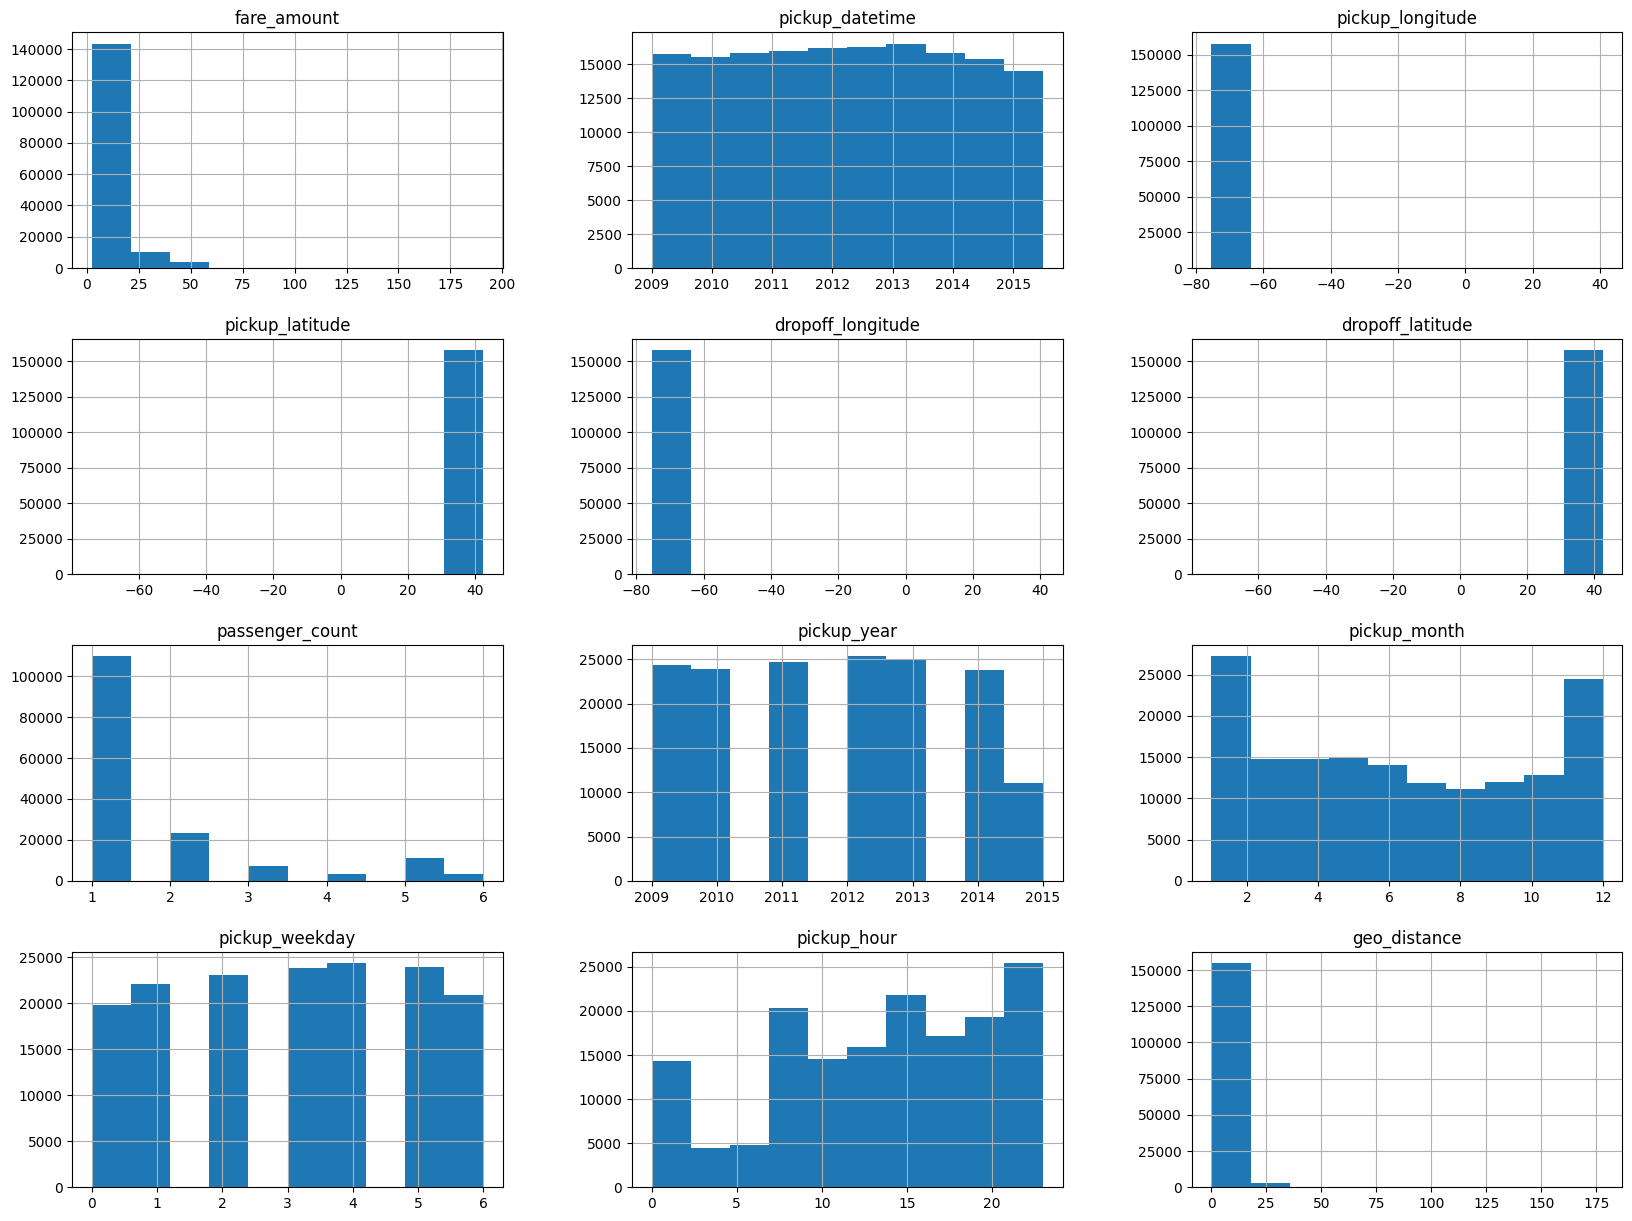

In [8]:
df_uber.hist(figsize=(20,15))

In [9]:
df_uber['pickup_year'] = pd.to_datetime(df_uber['pickup_datetime']).dt.year
df_uber['pickup_month'] = pd.to_datetime(df_uber['pickup_datetime']).dt.month
df_uber['pickup_day'] = pd.to_datetime(df_uber['pickup_datetime']).dt.day
df_uber['pickup_hour'] = pd.to_datetime(df_uber['pickup_datetime']).dt.hour
df_uber['pickup_weekday'] = pd.to_datetime(df_uber['pickup_datetime']).dt.weekday
df_uber['is_weekend'] = df_uber['pickup_weekday'].isin([5, 6]).astype(int)

# Eliminar columnas no necesarias como 'pickup_datetime'
df_uber = df_uber.drop(['pickup_datetime'], axis=1)
df_uber.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,geo_distance,pickup_day,is_weekend
0,8.1,-73.997719,40.741156,-73.976336,40.740022,1,2010,1,1,12,Winter,Afternoon,1.805911,5,0
1,4.9,-74.010218,40.711418,-74.004135,40.725397,1,2011,2,5,12,Winter,Afternoon,1.636753,5,1
2,16.1,-73.982152,40.764017,-73.891160,40.746512,1,2012,3,3,2,Spring,Night,7.907627,8,0
3,19.3,-74.000808,40.728923,-73.979544,40.653311,1,2011,10,0,22,Autumn,Night,8.596692,3,0
4,3.5,-73.985567,40.723071,-73.991561,40.726360,1,2013,7,1,19,Summer,Evenning,0.623609,23,0


<Axes: xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

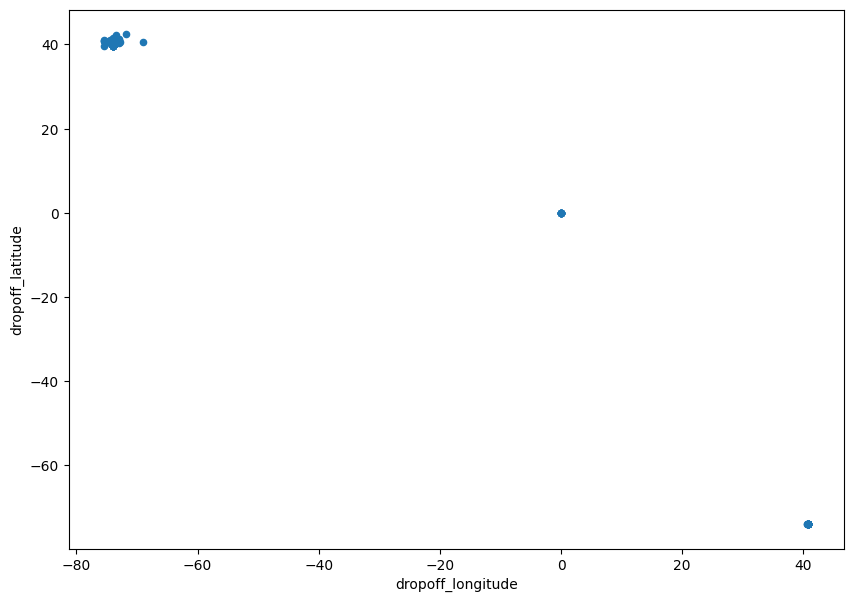

In [10]:
df_uber.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude", figsize=(10,7))

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

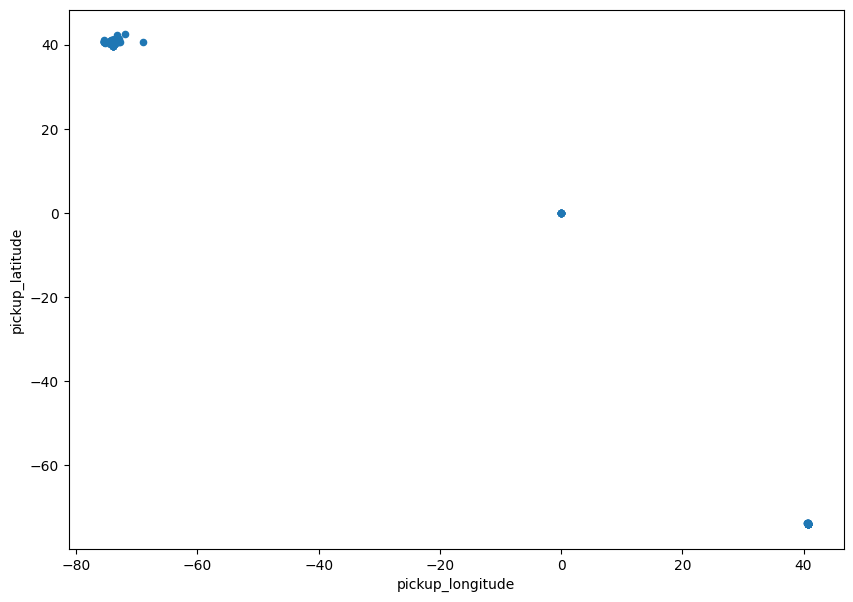

In [11]:
df_uber.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", figsize=(10,7))

In [12]:
df_uber.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour',
       'pickup_season', 'pickup_period', 'geo_distance', 'pickup_day',
       'is_weekend'],
      dtype='object')

array([[<Axes: xlabel='pickup_longitude', ylabel='pickup_longitude'>,
        <Axes: xlabel='pickup_latitude', ylabel='pickup_longitude'>,
        <Axes: xlabel='dropoff_longitude', ylabel='pickup_longitude'>,
        <Axes: xlabel='dropoff_latitude', ylabel='pickup_longitude'>,
        <Axes: xlabel='passenger_count', ylabel='pickup_longitude'>,
        <Axes: xlabel='pickup_year', ylabel='pickup_longitude'>,
        <Axes: xlabel='pickup_month', ylabel='pickup_longitude'>,
        <Axes: xlabel='pickup_weekday', ylabel='pickup_longitude'>,
        <Axes: xlabel='pickup_hour', ylabel='pickup_longitude'>,
        <Axes: xlabel='geo_distance', ylabel='pickup_longitude'>,
        <Axes: xlabel='pickup_day', ylabel='pickup_longitude'>,
        <Axes: xlabel='is_weekend', ylabel='pickup_longitude'>],
       [<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>,
        <Axes: xlabel='pickup_latitude', ylabel='pickup_latitude'>,
        <Axes: xlabel='dropoff_longitude', ylabel='pick

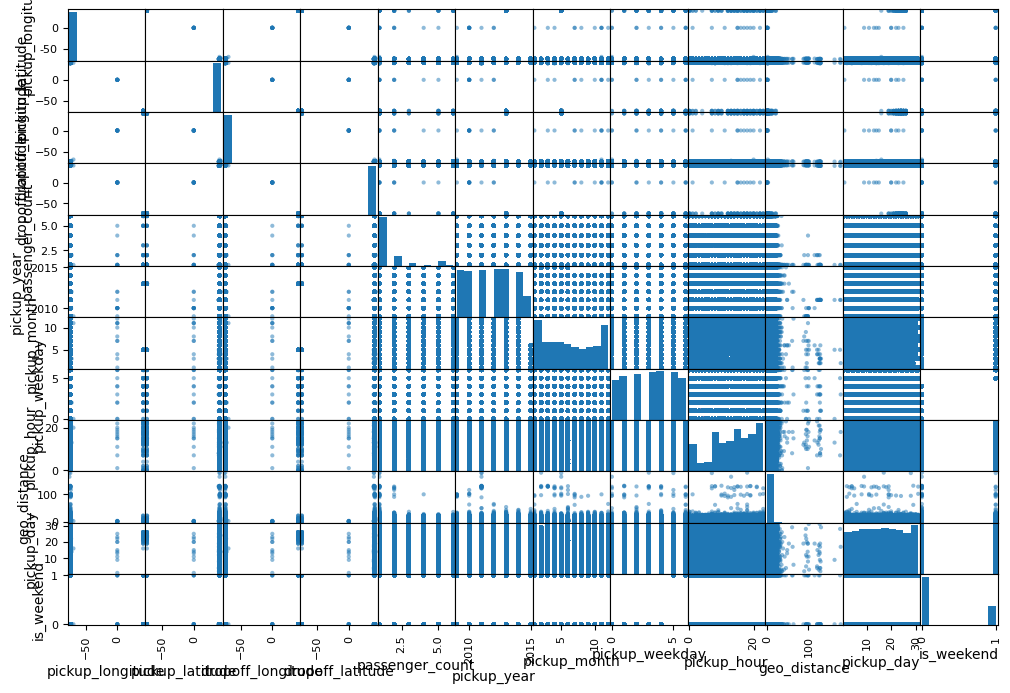

In [13]:
from pandas.plotting import scatter_matrix

atributos = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour','geo_distance', 'pickup_day',
       'is_weekend']
scatter_matrix(df_uber[atributos], figsize=(12, 8))


<Axes: >

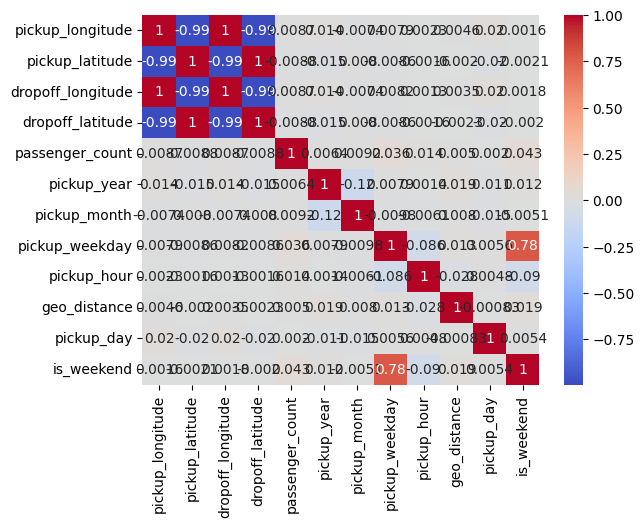

In [14]:
sns.heatmap(df_uber[atributos].corr(), annot=True, cmap=plt.get_cmap("coolwarm"))

## Variables categoricas


In [15]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158000 entries, 0 to 157999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        158000 non-null  float64
 1   pickup_longitude   158000 non-null  float64
 2   pickup_latitude    158000 non-null  float64
 3   dropoff_longitude  158000 non-null  float64
 4   dropoff_latitude   158000 non-null  float64
 5   passenger_count    158000 non-null  int64  
 6   pickup_year        158000 non-null  int32  
 7   pickup_month       158000 non-null  int32  
 8   pickup_weekday     158000 non-null  int32  
 9   pickup_hour        158000 non-null  int32  
 10  pickup_season      158000 non-null  object 
 11  pickup_period      158000 non-null  object 
 12  geo_distance       158000 non-null  float64
 13  pickup_day         158000 non-null  int32  
 14  is_weekend         158000 non-null  int64  
dtypes: float64(6), int32(5), int64(2), object(2)
memory

In [16]:
#Importamos la funcion OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

nominal_codificator = OneHotEncoder(sparse_output=False)
nominal_codificator.fit_transform(df_uber.pickup_season.to_frame())

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [17]:
nominal_codificator.fit_transform(df_uber.pickup_period.to_frame())

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [18]:
#Modulos importantes
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [19]:
df_uber.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour',
       'pickup_season', 'pickup_period', 'geo_distance', 'pickup_day',
       'is_weekend'],
      dtype='object')

In [20]:
lista_num = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour','geo_distance', 'pickup_day',
       'is_weekend']

lista_cat=['pickup_season', 'pickup_period']


In [21]:
# Crear el pipeline de preprocesamiento para datos numéricos y categóricos.
transformacion_num = Pipeline( [  ( 'scaler' , StandardScaler() )     ]   )
transformacion_cat = Pipeline( [  ( 'onehot' , OneHotEncoder() )     ]   )

In [22]:
# Definir los transformadores
transformacion = ColumnTransformer([  ('num',transformacion_num,lista_num ) ,
                                    ('cat',transformacion_cat,lista_cat )   ] )

In [23]:
X = df_uber.drop('fare_amount',axis=1 )
X.head(2)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,geo_distance,pickup_day,is_weekend
0,-73.997719,40.741156,-73.976336,40.740022,1,2010,1,1,12,Winter,Afternoon,1.805911,5,0
1,-74.010218,40.711418,-74.004135,40.725397,1,2011,2,5,12,Winter,Afternoon,1.636753,5,1


In [24]:
# Crear y (Valor de de la columna "median_house_value")
y = df_uber['fare_amount']
y

0          8.1
1          4.9
2         16.1
3         19.3
4          3.5
          ... 
157995    11.0
157996    23.7
157997     7.3
157998     6.1
157999     8.1
Name: fare_amount, Length: 158000, dtype: float64

In [25]:
# Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =train_test_split(X,y, train_size=0.8 )

In [26]:
# Revise  el tamaño de cada muestra
print( len(X) * 0.8 , len(X) * 0.2 )
print( X_train.shape,X_test.shape, y_train.shape,y_test.shape )

126400.0 31600.0
(126400, 14) (31600, 14) (126400,) (31600,)


## Modelo para entrenamiento

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Listas de columnas
lista_num = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour','geo_distance', 'pickup_day',
       'is_weekend']
lista_cat = ['pickup_season', 'pickup_period']

# Definir transformaciones
transformacion_num = Pipeline([('scaler', StandardScaler())])
transformacion_cat = Pipeline([('onehot', OneHotEncoder())])

# Combinar transformaciones
transformacion = ColumnTransformer([
    ('num', transformacion_num, lista_num),
    ('cat', transformacion_cat, lista_cat)
])

# Dividir los datos
X = df_uber.drop('fare_amount', axis=1)
y = df_uber['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Crear modelo de regresión lineal
linear_regression = LinearRegression()
modelo_regresion_lineal = Pipeline([
    ('transformer', transformacion),
    ('linear_regression', linear_regression)
])

# Entrenar el modelo
modelo_regresion_lineal.fit(X_train, y_train)

# Verificar resultados
print("Modelo entrenado exitosamente.")


Modelo entrenado exitosamente.


## Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score

cv_lineal = cross_val_score(  modelo_regresion_lineal , X , y ,
                           scoring = 'neg_mean_squared_error' ,
                           cv=5)
cv_lineal

array([-26.8021586 , -26.57918889, -37.26051203, -31.54439904,
       -28.09925586])

In [29]:
rmse_lineal = np.sqrt(- cv_lineal )
rmse_lineal

array([5.17708012, 5.15550084, 6.10413893, 5.61644007, 5.30087312])

In [30]:
# 6.  Calcular mean y standard deviation
media_lineal = rmse_lineal.mean()
std_lineal = rmse_lineal.std()
print( media_lineal , '+-' , std_lineal)

5.470806615563311 +- 0.35690034904919943


#### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

#1. Nombrar una variable para DecisionTreeRegressor()
DT_regression = DecisionTreeRegressor()

In [32]:
#2. Definir el Pipeline : Transformación  + modelo
modelo_DT = Pipeline( [  ( 'transformer' , transformacion )  ,
                                  ('DT_regression', DT_regression )   ]   )

In [33]:
modelo_DT.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['pickup_longitude',
                                                   'pickup_latitude',
                                                   'dropoff_longitude',
                                                   'dropoff_latitude',
                                                   'passenger_count',
                                                   'pickup_year',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour',
                                                   'geo_distance', 'pickup_day',
                                                   'is_weekend']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['pickup_season',
                                                   'pickup_period'])])),
                ('DT_regression', DecisionTreeRegressor())])

In [34]:
cv_DT= cross_val_score(  modelo_DT , X , y ,
                           scoring = 'neg_mean_squared_error' ,
                           cv=5)
cv_DT

array([-22.30284184, -23.55286136, -22.02460024, -24.68235433,
       -24.14905073])

In [35]:
rmse_DT= np.sqrt(- cv_DT )
rmse_DT

array([4.72258847, 4.85312903, 4.69303742, 4.96813389, 4.91416837])

In [36]:
media_DT = rmse_DT.mean()
std_DT = rmse_DT.std()
print( media_DT , '+-' , std_DT)

4.830211434132211 +- 0.10676703461143178


#### Random Forest

In [37]:
from sklearn.ensemble  import RandomForestRegressor
RF_regression = RandomForestRegressor()

In [38]:
#2. Definir el Pipeline : Transformación  + modelo
modelo_RF =  Pipeline( [  ( 'transformer' , transformacion )  ,
                                  ('RF_regression', RF_regression )   ]   ) 

In [39]:
#3. Ajustar el modelo
modelo_RF.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['pickup_longitude',
                                                   'pickup_latitude',
                                                   'dropoff_longitude',
                                                   'dropoff_latitude',
                                                   'passenger_count',
                                                   'pickup_year',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour',
                                                   'geo_distance', 'pickup_day',
                                                   'is_weekend']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['pickup_season',
                                                   'pickup_period'])])),
                ('RF_regression', RandomForestRegressor())])

In [40]:
cv_RF= cross_val_score(  modelo_RF , X , y ,
                           scoring = 'neg_mean_squared_error' ,
                           cv=5)
cv_RF

array([-11.2025333 , -11.42909051, -12.06914889, -11.3612767 ,
       -12.46998927])

In [41]:
rmse_RF= np.sqrt(- cv_RF )
rmse_RF

array([3.34701857, 3.38069379, 3.47406806, 3.3706493 , 3.5312872 ])

In [42]:
media_RF = rmse_RF.mean()
std_RF = rmse_RF.std()
print( media_RF , '+-' , std_RF)

3.4207433835713346 +- 0.0701600901647276


### Resultados

In [43]:
# Datos de evalación
list_model=['Linear Regression' , ' DecisionTree' , ' Random Forest ']
list_mean=[media_lineal, media_DT, media_RF]
list_sd=[ std_lineal ,std_DT, std_RF,std_RF ]

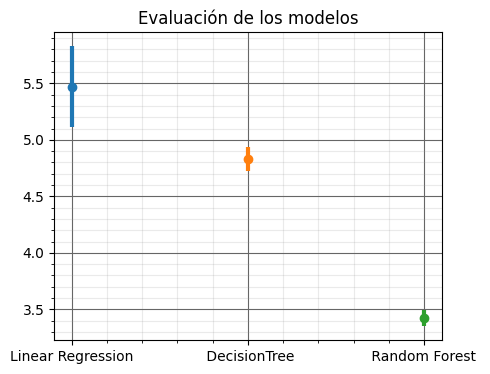

In [44]:
# Agregamos una grafica para comparar visualmente los resultados
plt.figure(figsize=(5, 4))
for i, (model_mean, model_sd) in enumerate(zip(list_mean, list_sd)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_sd,
                 fmt='o',
                 linewidth=3)
plt.xticks([0,1,2], list_model)
plt.title("Evaluación de los modelos")
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.show()

### Gradient Boosting

```bash
pip install xgboost lightgbm catboost

```

####  XGBoost

In [45]:
from xgboost import XGBRegressor

In [46]:
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=7, random_state=42)

modelo_xgb = Pipeline([
    ('transformer', transformacion),
    ('xgb', xgb)
])

# Entrenamiento
modelo_xgb.fit(X_train, y_train)
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10
cv_xgb = cross_val_score(modelo_xgb, X, y, scoring='neg_mean_squared_error', cv=5)
cv_xgb

array([-10.05485224, -11.17968049, -11.45950518, -10.70843259,
       -11.45947038])

In [47]:
# 5. Realizar el cambio de signo y sacar la raiz
rmse_xgb= np.sqrt(- cv_xgb )
rmse_xgb

array([3.1709387 , 3.34360292, 3.38518909, 3.27237415, 3.38518395])

In [48]:
# 6. Mostrar el resultado usando la funcion display_scores
media_xgb = rmse_xgb.mean()
std_xgb = rmse_xgb.std()
print( media_xgb , '+-' , std_xgb)

3.311457762780904 +- 0.08145956822465766


####  LightGBM

In [49]:
from lightgbm import LGBMRegressor

# Modelo LightGBM
lgbm = LGBMRegressor()
modelo_lgbm = Pipeline([
    ('transformer', transformacion),
    ('lgbm', lgbm)
])

# Entrenamiento
modelo_lgbm.fit(X_train, y_train)# 4. Calcular el score con la validación cruzada CV=10
cv_lgbm = cross_val_score(modelo_lgbm, X, y, scoring='neg_mean_squared_error', cv=5)
cv_lgbm

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 126400, number of used features: 20
[LightGBM] [Info] Start training from score 11.325357
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 126400, number of used features: 20
[LightGBM] [Info] Start training from score 11.339569
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Tota

array([-10.84458966, -11.42195667, -11.64716317, -11.16002177,
       -12.15858463])

In [50]:
# 5. Realizar el cambio de signo y sacar la raiz
rmse_lgbm= np.sqrt(- cv_lgbm )
rmse_lgbm

array([3.29311246, 3.37963854, 3.41279404, 3.34066188, 3.48691621])

In [51]:
# 6. Mostrar el resultado usando la funcion display_scores
media_lgbm = rmse_lgbm.mean()
std_lgbm = rmse_lgbm.std()
print( media_lgbm , '+-' , std_lgbm)

3.38262462455938 +- 0.0656797451894652


#### CatBoost

In [52]:
from catboost import CatBoostRegressor


# Modelo CatBoost
catboost = CatBoostRegressor()
modelo_catboost = Pipeline([
    ('transformer', transformacion),
    ('catboost', catboost)
])

# Entrenamiento
modelo_catboost.fit(X_train, y_train)

Learning rate set to 0.087954
0:	learn: 8.8331837	total: 64.2ms	remaining: 1m 4s
1:	learn: 8.2462308	total: 82.5ms	remaining: 41.2s
2:	learn: 7.7270061	total: 98.5ms	remaining: 32.8s
3:	learn: 7.2543066	total: 117ms	remaining: 29.2s
4:	learn: 6.8378593	total: 132ms	remaining: 26.2s
5:	learn: 6.4625486	total: 148ms	remaining: 24.6s
6:	learn: 6.1299365	total: 163ms	remaining: 23.1s
7:	learn: 5.8399761	total: 181ms	remaining: 22.4s
8:	learn: 5.5818938	total: 196ms	remaining: 21.6s
9:	learn: 5.3472310	total: 211ms	remaining: 20.9s
10:	learn: 5.1435239	total: 226ms	remaining: 20.4s
11:	learn: 4.9626381	total: 245ms	remaining: 20.1s
12:	learn: 4.8042173	total: 262ms	remaining: 19.9s
13:	learn: 4.6636791	total: 279ms	remaining: 19.6s
14:	learn: 4.5384773	total: 295ms	remaining: 19.4s
15:	learn: 4.4300354	total: 311ms	remaining: 19.1s
16:	learn: 4.3379362	total: 326ms	remaining: 18.8s
17:	learn: 4.2552532	total: 344ms	remaining: 18.7s
18:	learn: 4.1807732	total: 360ms	remaining: 18.6s
19:	lear

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['pickup_longitude',
                                                   'pickup_latitude',
                                                   'dropoff_longitude',
                                                   'dropoff_latitude',
                                                   'passenger_count',
                                                   'pickup_year',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour',
                                                   'geo_distance', 'pickup_day',
                                                   'is_weekend']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['pickup_season',
                                                   'pickup_period'])])),
                ('catboost',
                 <catboost.core.CatBoostRegressor object at 0x737b3a012f50>)])

In [53]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10
cv_catboost= cross_val_score(  modelo_catboost , X , y ,
                           scoring = 'neg_mean_squared_error' ,
                           cv=5)
cv_catboost

Learning rate set to 0.087954
0:	learn: 8.8685600	total: 16.1ms	remaining: 16.1s
1:	learn: 8.2803528	total: 38.5ms	remaining: 19.2s
2:	learn: 7.7603490	total: 56.7ms	remaining: 18.9s
3:	learn: 7.2854192	total: 73.8ms	remaining: 18.4s
4:	learn: 6.8669387	total: 93.4ms	remaining: 18.6s
5:	learn: 6.4863745	total: 112ms	remaining: 18.5s
6:	learn: 6.1536328	total: 127ms	remaining: 18s
7:	learn: 5.8625031	total: 143ms	remaining: 17.7s
8:	learn: 5.6054298	total: 159ms	remaining: 17.6s
9:	learn: 5.3747547	total: 175ms	remaining: 17.3s
10:	learn: 5.1683320	total: 192ms	remaining: 17.2s
11:	learn: 4.9837848	total: 209ms	remaining: 17.2s
12:	learn: 4.8218750	total: 229ms	remaining: 17.4s
13:	learn: 4.6801150	total: 242ms	remaining: 17s
14:	learn: 4.5533572	total: 256ms	remaining: 16.8s
15:	learn: 4.4442060	total: 271ms	remaining: 16.6s
16:	learn: 4.3506035	total: 286ms	remaining: 16.5s
17:	learn: 4.2674126	total: 300ms	remaining: 16.4s
18:	learn: 4.1950759	total: 312ms	remaining: 16.1s
19:	learn:

array([ -9.96237028, -10.6888544 , -11.31710481, -10.156945  ,
       -11.25145764])

In [54]:
# 5. Realizar el cambio de signo y sacar la raiz
rmse_catboost= np.sqrt(- cv_catboost )
rmse_catboost

array([3.15632227, 3.26938135, 3.36409049, 3.18699624, 3.35431925])

In [55]:
# 6. Mostrar el resultado usando la funcion display_scores
media_catboost = rmse_catboost.mean()
std_catboost = rmse_catboost.std()
print( media_catboost , '+-' , std_catboost)

3.2662219191148396 +- 0.08450327847339664


### Evaluación

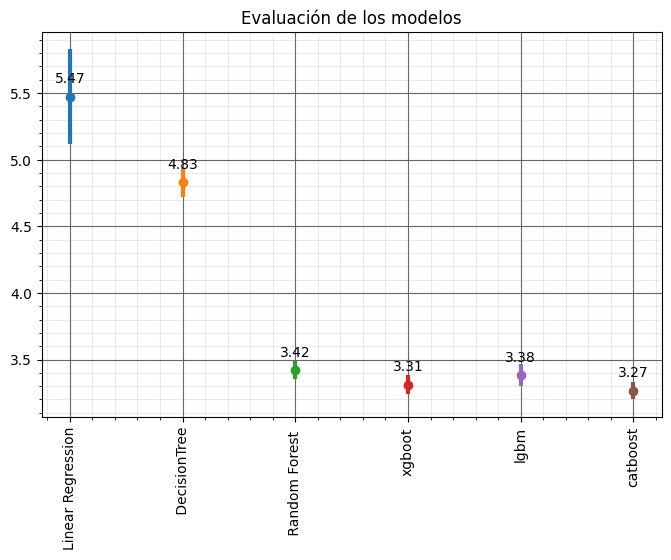

In [56]:
# Datos de evaluación
list_model=['Linear Regression' , ' DecisionTree' , ' Random Forest ','xgboot','lgbm','catboost']
list_mean=[media_lineal, media_DT, media_RF,media_xgb,media_lgbm,media_catboost]
list_sd=[ std_lineal ,std_DT, std_RF,std_RF,std_xgb,std_lgbm,std_catboost]

# Agregamos una grafica para comparar visualmente los resultados
plt.figure(figsize=(8, 5))
for i, (model_mean, model_sd) in enumerate(zip(list_mean, list_sd)):
  plt.errorbar(i, model_mean,
         xerr=0,
         yerr=model_sd,
         fmt='o',
         linewidth=3)
  plt.annotate(f'{model_mean:.2f}', (i, model_mean), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(range(len(list_model)), list_model, rotation=90)
plt.title("Evaluación de los modelos")
plt.grid('visible',
     which='major',
     color='#666',
     linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
     which='minor',
     color='#999',
     linestyle='-',
     alpha=0.2)
plt.show()

# Finetuning


In [57]:
from sklearn.model_selection import RandomizedSearchCV


# Definir el modelo en el pipeline
catboost = CatBoostRegressor(verbose=0)  # Silenciar la salida
modelo_catboost = Pipeline([
    ('transformer', transformacion),
    ('catboost', catboost)
])

# Espacio de búsqueda
param_grid = {
    'catboost__depth': [4, 6, 8],
    'catboost__learning_rate': [0.01, 0.05, 0.1],
    'catboost__iterations': [100, 300, 500],
    'catboost__l2_leaf_reg': [1, 3, 5],
    'catboost__bagging_temperature': [0, 1, 2]
}

random_search = RandomizedSearchCV(
    estimator=modelo_catboost,
    param_distributions=param_grid,
    n_iter=20,  # Número de combinaciones aleatorias a probar
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados:", random_search.best_params_)
print("Mejor RMSE encontrado:", (-random_search.best_score_)**0.5)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END catboost__bagging_temperature=0, catboost__depth=4, catboost__iterations=100, catboost__l2_leaf_reg=5, catboost__learning_rate=0.01; total time=  14.9s
[CV] END catboost__bagging_temperature=0, catboost__depth=4, catboost__iterations=100, catboost__l2_leaf_reg=5, catboost__learning_rate=0.01; total time=  15.0s
[CV] END catboost__bagging_temperature=0, catboost__depth=4, catboost__iterations=100, catboost__l2_leaf_reg=5, catboost__learning_rate=0.01; total time=  15.9s
[CV] END catboost__bagging_temperature=0, catboost__depth=4, catboost__iterations=100, catboost__l2_leaf_reg=5, catboost__learning_rate=0.01; total time=  16.7s
[CV] END catboost__bagging_temperature=0, catboost__depth=4, catboost__iterations=100, catboost__l2_leaf_reg=5, catboost__learning_rate=0.01; total time=  19.1s
[CV] END catboost__bagging_temperature=0, catboost__depth=4, catboost__iterations=500, catboost__l2_leaf_reg=5, catboost__learning_ra

In [59]:
# Modelo CatBoost
fn_catboost = CatBoostRegressor(random_search.best_params_,verbose=0)
modelo_catboost_fn = Pipeline([
    ('transformer', transformacion),
    ('catboost', catboost)
])
# Entrenamiento
modelo_catboost_fn.fit(X_train, y_train,)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['pickup_longitude',
                                                   'pickup_latitude',
                                                   'dropoff_longitude',
                                                   'dropoff_latitude',
                                                   'passenger_count',
                                                   'pickup_year',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour',
                                                   'geo_distance', 'pickup_day',
                                                   'is_weekend']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['pickup_season',
                                                   'pickup_period'])])),
                ('catboost',
                 <catboost.core.CatBoostRegressor object at 0x737b39110670>)])

In [60]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10
cv_cb_tunned= cross_val_score(  modelo_catboost_fn , X , y ,
                           scoring = 'neg_mean_squared_error' ,
                           cv=5)
cv_cb_tunned

array([ -9.96237028, -10.6888544 , -11.31710481, -10.156945  ,
       -11.25145764])

In [61]:
# 5. Realizar el cambio de signo y sacar la raiz
rmse_cb_tunned= np.sqrt(- cv_cb_tunned )
rmse_cb_tunned

array([3.15632227, 3.26938135, 3.36409049, 3.18699624, 3.35431925])

In [62]:
# 6. Mostrar el resultado usando la funcion display_scores
media_cb_tunned = rmse_cb_tunned.mean()
std_cb_tunned = rmse_cb_tunned.std()
print( media_cb_tunned , '+-' , std_cb_tunned)

3.2662219191148396 +- 0.08450327847339664


## última evaluación

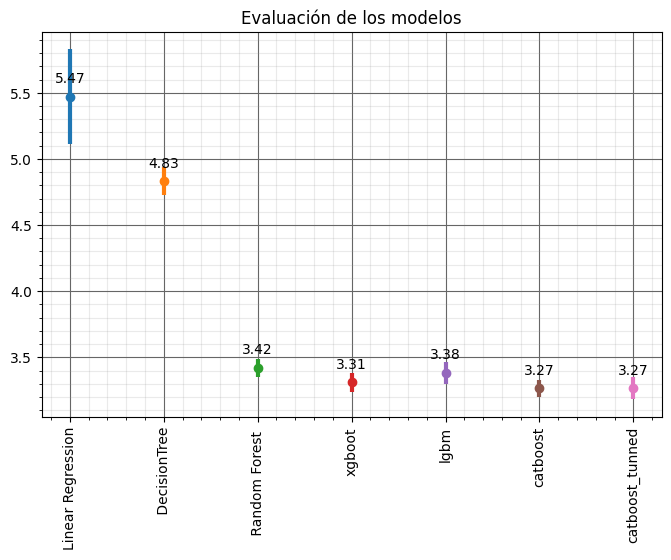

In [63]:
# Datos de evaluación
list_model=['Linear Regression' , ' DecisionTree' , ' Random Forest ','xgboot','lgbm','catboost','catboost_tunned']
list_mean=[media_lineal, media_DT, media_RF,media_xgb,media_lgbm,media_catboost,media_cb_tunned]
list_sd=[ std_lineal ,std_DT, std_RF,std_RF,std_xgb,std_lgbm,std_catboost,std_cb_tunned]

# Agregamos una grafica para comparar visualmente los resultados
plt.figure(figsize=(8, 5))
for i, (model_mean, model_sd) in enumerate(zip(list_mean, list_sd)):
  plt.errorbar(i, model_mean,
         xerr=0,
         yerr=model_sd,
         fmt='o',
         linewidth=3)
  plt.annotate(f'{model_mean:.2f}', (i, model_mean), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(range(len(list_model)), list_model, rotation=90)
plt.title("Evaluación de los modelos")
plt.grid('visible',
     which='major',
     color='#666',
     linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
     which='minor',
     color='#999',
     linestyle='-',
     alpha=0.2)
plt.show()

In [68]:
catboost.get_params()

{'loss_function': 'RMSE', 'verbose': 0}

In [69]:
fn_catboost.get_params()

{'iterations': {'catboost__learning_rate': 0.1,
  'catboost__l2_leaf_reg': 1,
  'catboost__iterations': 500,
  'catboost__depth': 8,
  'catboost__bagging_temperature': 2},
 'loss_function': 'RMSE',
 'verbose': 0}

In [70]:
print(f'media castboost: {media_catboost} +- {std_catboost}')
print(f'media castboost tunning: {media_cb_tunned} +- {std_cb_tunned}')


media castboost: 3.2662219191148396 +- 0.08450327847339664
media castboost tunning: 3.2662219191148396 +- 0.08450327847339664


Conclusión tanto el modelo `castboot`, como la versión _fine-tuning_ tienen rendimiento indendicos, porque es indistinto usar cualquiera para la predicción final

# Predicción

In [71]:
df_prediccion = pd.read_csv('./uber_test.csv')
df_prediccion

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,geo_distance
0,2015-01-17 22:57:21+00:00,-73.975792,40.776299,-73.967140,40.788574,4,2015,1,5,22,Winter,Night,1.547205
1,2013-10-13 04:49:17+00:00,-73.978827,40.744816,-73.856187,40.727704,2,2013,10,6,4,Autumn,Night,10.506739
2,2010-10-08 17:57:22+00:00,-73.996363,40.715990,-74.004877,40.707024,2,2010,10,4,17,Autumn,Evenning,1.228383
3,2013-08-17 00:55:00+00:00,-73.997152,40.747187,-73.929623,40.865922,1,2013,8,5,0,Summer,Night,14.374132
4,2010-12-04 15:39:00+00:00,-73.957808,40.773403,-74.008700,40.733433,1,2010,12,5,15,Winter,Afternoon,6.174933
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34342,2013-07-08 20:45:05+00:00,-73.992589,40.730462,-73.988546,40.737121,1,2013,7,0,20,Summer,Evenning,0.815051
34343,2011-07-22 08:29:53+00:00,-73.996740,40.737327,-73.986636,40.736865,1,2011,7,4,8,Summer,Morning,0.852848
34344,2014-01-04 16:30:00+00:00,-73.984947,40.728052,-73.952290,40.778182,1,2014,1,5,16,Winter,Afternoon,6.216003
34345,2013-12-13 18:37:00+00:00,-73.975162,40.782335,-73.983455,40.762592,2,2013,12,4,18,Winter,Evenning,2.303719


In [72]:
df_prediccion['pickup_datetime'] = pd.to_datetime(df_prediccion['pickup_datetime'])
df_prediccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34347 entries, 0 to 34346
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    34347 non-null  datetime64[ns, UTC]
 1   pickup_longitude   34347 non-null  float64            
 2   pickup_latitude    34347 non-null  float64            
 3   dropoff_longitude  34347 non-null  float64            
 4   dropoff_latitude   34347 non-null  float64            
 5   passenger_count    34347 non-null  int64              
 6   pickup_year        34347 non-null  int64              
 7   pickup_month       34347 non-null  int64              
 8   pickup_weekday     34347 non-null  int64              
 9   pickup_hour        34347 non-null  int64              
 10  pickup_season      34347 non-null  object             
 11  pickup_period      34347 non-null  object             
 12  geo_distance       34347 non-null  float64    

In [73]:
df_prediccion['pickup_year'] = pd.to_datetime(df_prediccion['pickup_datetime']).dt.year
df_prediccion['pickup_month'] = pd.to_datetime(df_prediccion['pickup_datetime']).dt.month
df_prediccion['pickup_day'] = pd.to_datetime(df_prediccion['pickup_datetime']).dt.day
df_prediccion['pickup_hour'] = pd.to_datetime(df_prediccion['pickup_datetime']).dt.hour
df_prediccion['pickup_weekday'] = pd.to_datetime(df_prediccion['pickup_datetime']).dt.weekday
df_prediccion['is_weekend'] = df_prediccion['pickup_weekday'].isin([5, 6]).astype(int)

# Eliminar columnas no necesarias como 'pickup_datetime'
df_prediccion = df_prediccion.drop(['pickup_datetime'], axis=1)
df_prediccion.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,geo_distance,pickup_day,is_weekend
0,-73.975792,40.776299,-73.967140,40.788574,4,2015,1,5,22,Winter,Night,1.547205,17,1
1,-73.978827,40.744816,-73.856187,40.727704,2,2013,10,6,4,Autumn,Night,10.506739,13,1
2,-73.996363,40.715990,-74.004877,40.707024,2,2010,10,4,17,Autumn,Evenning,1.228383,8,0
3,-73.997152,40.747187,-73.929623,40.865922,1,2013,8,5,0,Summer,Night,14.374132,17,1
4,-73.957808,40.773403,-74.008700,40.733433,1,2010,12,5,15,Winter,Afternoon,6.174933,4,1


In [74]:
predd = modelo_catboost_fn.predict(df_prediccion)
predd

array([ 6.54251617, 30.43803861,  6.59858369, ..., 16.25542132,
       11.04677427,  6.16772146])

In [76]:
pd.DataFrame(predd).to_csv('CD_16_VictorHugo_MartinezGonzalez.csv', index=False, header=False)